# Análisis Exploratorio de Datos

En este notebook se realizá un análisis exploratorio de los datos del dataset [Global Air Pollution][kaggle] de Kaggle


[kaggle]: https://www.kaggle.com/datasets/hasibalmuzdadid/global-air-pollution-dataset
#### **Información del Dataset**
Este dataset contiene información sobre los niveles de contaminación del aire en diferentes ciudades y países alrededor del mundo. Los datos incluyen mediciones de los principales contaminantes del aire, como monóxido de carbono (CO), ozono (O₃), dióxido de nitrógeno (NO₂) y partículas finas (PM2.5), junto con sus respectivos índices de calidad del aire (AQI).

Cada registro en este conjunto de datos representa las concentraciones de estos contaminantes en una ciudad en particular, proporcionando una clasificación de la calidad del aire que puede ser: 

- Buena
- Moderada
- Dañina para Grupos Sensibles
- Dañina
- Muy Dañina
- Peligrosa

#### **Objetivos**

- Descripción de las columnas del dataset
- Identificación de valores nulos y duplicados
- Visualización Inicial del conjunto de datos

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Cargando el dataset
ruta = '../data/global_air_pollution.csv'
df = pd.read_csv(ruta)

### Dimensión del Dataset (Filas, Columnas)

In [4]:
print("Filas:",df.shape[0])
print("Columnas:",df.shape[1])

Filas: 23463
Columnas: 12


### Inspección Inicial del Dataset
#### Distinción entre Variables Númericas y Categoricas

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23463 entries, 0 to 23462
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Country             23036 non-null  object
 1   City                23462 non-null  object
 2   AQI Value           23463 non-null  int64 
 3   AQI Category        23463 non-null  object
 4   CO AQI Value        23463 non-null  int64 
 5   CO AQI Category     23463 non-null  object
 6   Ozone AQI Value     23463 non-null  int64 
 7   Ozone AQI Category  23463 non-null  object
 8   NO2 AQI Value       23463 non-null  int64 
 9   NO2 AQI Category    23463 non-null  object
 10  PM2.5 AQI Value     23463 non-null  int64 
 11  PM2.5 AQI Category  23463 non-null  object
dtypes: int64(5), object(7)
memory usage: 2.1+ MB


#### Resumen Estadístico

In [6]:
df.describe()

,AQI Value,CO AQI Value,Ozone AQI Value,NO2 AQI Value,PM2.5 AQI Value
count,23463.000000,23463.000000,23463.000000,23463.000000,23463.000000
mean,72.010868,1.368367,35.193709,3.063334,68.519755
std,56.055220,1.832064,28.098723,5.254108,54.796443
min,6.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,1.000000,21.000000,0.000000,35.000000
50%,55.000000,1.000000,31.000000,1.000000,54.000000
75%,79.000000,1.000000,40.000000,4.000000,79.000000
max,500.000000,133.000000,235.000000,91.000000,500.000000


### Estructura del Conjunto de Datos
#### Características
#### Características
1. `Country` : Nombre del país
2. `City`: Nombre de la ciudad
3. `AQI Value`: Valor AQI general de la ciudad
4. `AQI Category`: Categoría general del AQI de la ciudad
5. `CO AQI Value`: Valor AQI de monóxido de carbono de la ciudad
6. `CO AQI Category`: Categoría AQI de monóxido de carbono de la ciudad
7. `Ozone AQI Value`: valor AQI del ozono de la ciudad
8. `Ozone AQI Category`: Categoría AQI del ozono de la ciudad
9. `NO2 AQI Value`: Valor AQI de dióxido de nitrógeno de la ciudad
10. `NO2 AQI Category`: Categoría AQI del dióxido de nitrógeno de la ciudad
11. `PM2.5 AQI Value`: Valor AQI de materia particulada con un diámetro de 2,5 micrómetros o menos de la ciudad.
12. `PM2.5 AQI Category`: Categoría AQI de materia particulada con un diámetro de 2,5 micrómetros o menos de la ciudad.

#### Atributos Categóricos:
- Country.
- City.
- AQI Category.
- CO AQI Category.
- Ozone AQI Category.
- NO2 AQI Category.
- PM2.5 AQI Category.

#### Atributos Númericos:
- AQI Value.
- CO AQI Value.
- Ozone AQI Value.
- NO2 AQI Value.
- PM2.5 AQI Value.

### Primeras 10 Filas del Dataset

In [7]:
df.head(10) 

,Country,City,AQI Value,AQI Category,CO AQI Value,CO AQI Category,Ozone AQI Value,Ozone AQI Category,NO2 AQI Value,NO2 AQI Category,PM2.5 AQI Value,PM2.5 AQI Category
0,Russian Federation,Praskoveya,51,Moderate,1,Good,36,Good,0,Good,51,Moderate
1,Brazil,Presidente Dutra,41,Good,1,Good,5,Good,1,Good,41,Good
2,Italy,Priolo Gargallo,66,Moderate,1,Good,39,Good,2,Good,66,Moderate
3,Poland,Przasnysz,34,Good,1,Good,34,Good,0,Good,20,Good
4,France,Punaauia,22,Good,0,Good,22,Good,0,Good,6,Good
5,United States of America,Punta Gorda,54,Moderate,1,Good,14,Good,11,Good,54,Moderate
6,Germany,Puttlingen,62,Moderate,1,Good,35,Good,3,Good,62,Moderate
7,Belgium,Puurs,64,Moderate,1,Good,29,Good,7,Good,64,Moderate
8,Russian Federation,Pyatigorsk,54,Moderate,1,Good,41,Good,1,Good,54,Moderate
9,Egypt,Qalyub,142,Unhealthy for Sensitive Groups,3,Good,89,Moderate,9,Good,142,Unhealthy for Sensitive Groups


### Distribución y Visualización de Variables

Antes de aplicar cualquier transformación, es importante entender cómo se distribuyen las variables en su estado original. Esto nos ayuda a detectar asimetrías, outliers o los titpos de distribuciones si son normales, uniformes o bimodales.

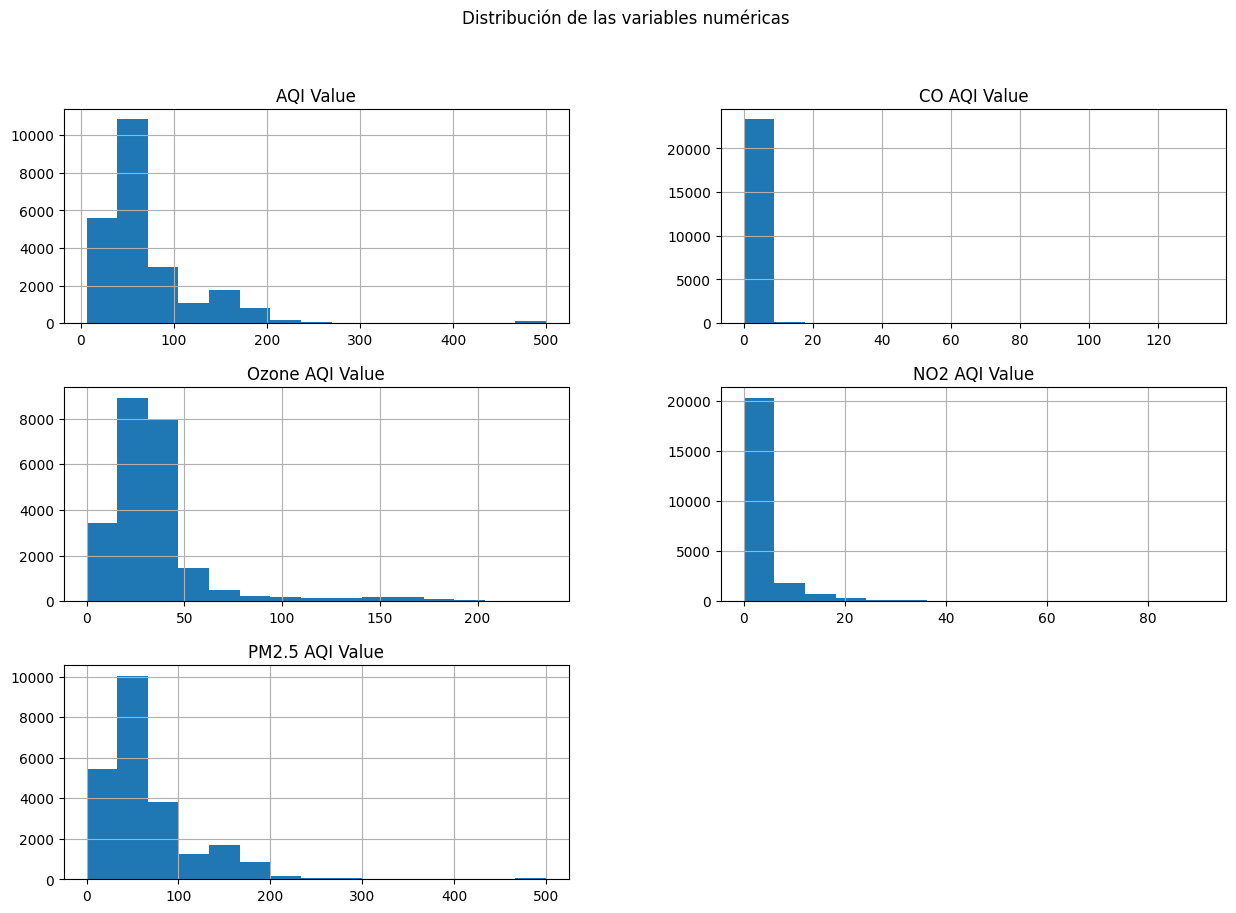

In [8]:
df.hist(bins=15, figsize=(15, 10))
plt.suptitle("Distribución de las variables numéricas")
plt.show()

### Cantidad de categorías de AQI (Índice de Calidad del Aire)

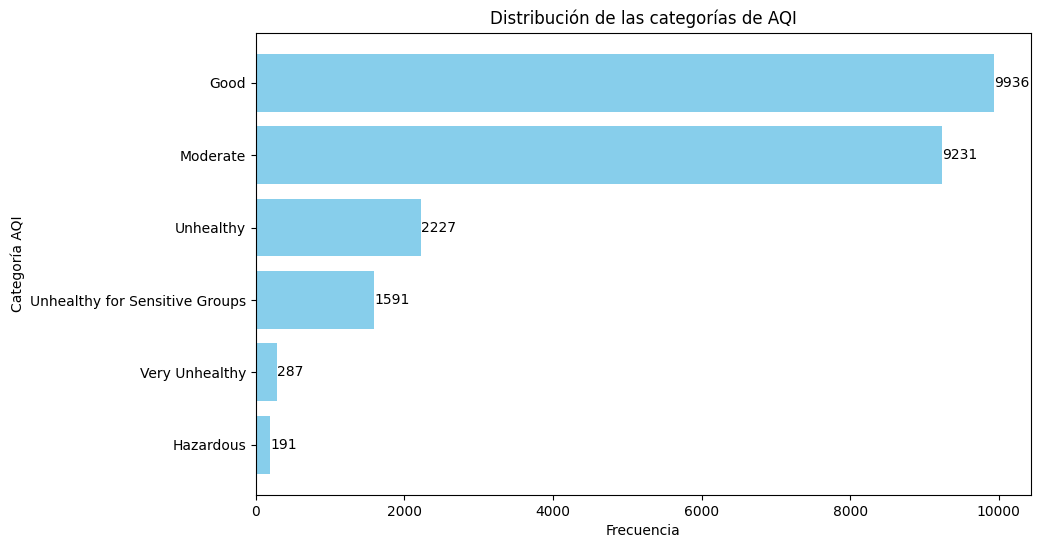

In [9]:
# Se cálcula la cantidad de categorías y se ordena de forma ascendente
categorias = df['AQI Category'].value_counts().sort_values(ascending=True)

# Gráfico de barras horizontales
plt.figure(figsize=(10, 6))
bars = plt.barh(categorias.index, categorias.values, color='skyblue')

# Etiquetas de datos
for bar in bars:
    plt.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, 
             str(int(bar.get_width())), va='center', fontsize=10)

plt.title('Distribución de las categorías de AQI')
plt.xlabel('Frecuencia')
plt.ylabel('Categoría AQI')

plt.show()